### Importing Libraries

In [1]:
import numpy as np  
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# sklearn
# model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
# evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# bag of words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# text preprocessing
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# options
# Increase width to see the article_title clearly
pd.set_option('display.max_colwidth', None)
sns.set(style='whitegrid', font_scale=1.5)


# our project path
project_path = r"C:\Users\HP\Desktop\For CV\Project 5"
# check working directory
print("Working directory:", os.getcwd())
# change working directory and list all files in project directory
os.chdir(project_path)
print("New working directory", project_path)
print()
for dirname, _, filenames in os.walk(project_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Working directory: C:\Users\HP\Desktop\For CV\Project 5\model building and evaluation
New working directory C:\Users\HP\Desktop\For CV\Project 5

C:\Users\HP\Desktop\For CV\Project 5\.ipynb_checkpoints\articles_scraper-checkpoint.ipynb
C:\Users\HP\Desktop\For CV\Project 5\data cleaning\clean_df.csv
C:\Users\HP\Desktop\For CV\Project 5\data cleaning\data_cleaning.html
C:\Users\HP\Desktop\For CV\Project 5\data cleaning\data_cleaning.ipynb
C:\Users\HP\Desktop\For CV\Project 5\data cleaning\.ipynb_checkpoints\data_cleaning-checkpoint.ipynb
C:\Users\HP\Desktop\For CV\Project 5\data collection\articles_scraper.html
C:\Users\HP\Desktop\For CV\Project 5\data collection\articles_scraper.ipynb
C:\Users\HP\Desktop\For CV\Project 5\data collection\arts_2.csv
C:\Users\HP\Desktop\For CV\Project 5\data collection\economy_2.csv
C:\Users\HP\Desktop\For CV\Project 5\data collection\sports_2.csv
C:\Users\HP\Desktop\For CV\Project 5\data collection\.ipynb_checkpoints\articles_scraper-checkpoint.ipynb
C:\U

In [2]:
# load our data
data = pd.read_csv(r'C:\Users\HP\Desktop\For CV\Project 5\data preprocessing\final_df_2.csv')
print(data.columns)
# drop the 'Unnamed: 0' column
data.drop(columns = 'Unnamed: 0', inplace=True)

Index(['Unnamed: 0', 'final_text', 'category'], dtype='object')


In [3]:
# take a look at the data
display(data.head(1))
print()
display(data.tail(1))

,final_text,category
0,egyptbas paymob rais 50 mln seri b fund round egyptbas paymob financi servic merchant platform rais 50 million seri b fund platform use grow product rang expand egyptian market well new market across middl east africa region,economy


,final_text,category
30598,humourless night 12 novemb standup comedi show akram hosni took place el sakia culturewheel theme current educ system materi adapt satir book awel mokar haitham dabbour,art


In [4]:
# split data to training and testing
X_train, X_test, y_train, y_test = train_test_split(data['final_text'], data['category'],
                                                    test_size=0.2, random_state=25, shuffle=True)

In [5]:
# View train and test shapes
print(f"train set is {X_train.shape[0]} records and test set is {X_test.shape[0]}")
print(X_train.head())
print()
print(y_train.head())

train set is 24479 records and test set is 6120
27995                                                                daniel barenboim la scala music director renown conductor daniel barenboim take post music director la scala opera hous itali
13649                                                                                                                                              lewandowski give bayern win leverkusen stay top
26499                      art alert even french music faurã¯â¿â½ã¯â¿â½ requiem alexandria even featur faurã¯â¿â½ã¯â¿â½ requiem work french compos bibliotheca alexandrina orchestra choir conduct
3298     egypt host 12th round egyptianrussian joint committe april russian mission visit egypt decemb intraafrican trade fair 2019 hold talk government privat sector actor further cooper invest
3475                                                                                                                                                            egypt bours 

### Tf-Idf Vectorizer

In [6]:
# Create vectorizing object
tf_idf = TfidfVectorizer()
# fit_transform on training data
X_train_vecs = tf_idf.fit_transform(X_train)
# transform on testing data
X_test_vecs = tf_idf.transform(X_test)

In [7]:
# view vectorizer output
# train set
print(X_train[0])
print()
print(X_train_vecs[0])
print()
print(X_train_vecs.shape)

egyptbas paymob rais 50 mln seri b fund round egyptbas paymob financi servic merchant platform rais 50 million seri b fund platform use grow product rang expand egyptian market well new market across middl east africa region

  (0, 11479)	0.13975903596193923
  (0, 10807)	0.12651829045666085
  (0, 15373)	0.12407116457425252
  (0, 16259)	0.16625954405663176
  (0, 19989)	0.11647463107620974
  (0, 5740)	0.18306357675148482
  (0, 17305)	0.14793870284165184
  (0, 6741)	0.24332892433262088
  (0, 14505)	0.22262244745902215
  (0, 18139)	0.5038549433184397
  (0, 12266)	0.2836105324541515
  (0, 3781)	0.47484414243432754
  (0, 6279)	0.4288458399043459

(24479, 22585)


In [8]:
# view vectorizer output
# test set
print(X_test[1])
print()
print(X_test_vecs[1])
print()
print(X_test_vecs.shape)

egyptâ inflat speed amid war ukrain rise food energi price egyptâ headlin annual inflat rate acceler 149 percent april 121 percent record march 44 percent correspond month 2021 central agenc public mobilis statist capma announc tuesday

  (0, 16482)	0.5753841121820364
  (0, 15873)	0.1752552340919389
  (0, 15240)	0.17323404966131775
  (0, 14708)	0.2391709356240136
  (0, 13620)	0.35786029643780115
  (0, 11118)	0.18512457723189746
  (0, 9446)	0.3874813969232442
  (0, 7530)	0.23225089964598744
  (0, 7335)	0.11347995099294576
  (0, 7323)	0.08519966221245817
  (0, 6731)	0.26807596407162987
  (0, 6416)	0.21910939634316423
  (0, 277)	0.21113552035473962

(6120, 22585)


Thought it may not be clear, each word has an index in our vocabulary(a set of all unique word in our training data or better call it unique set of features)

and

each word get a value corresponding to its importance.

In [9]:
# # Testing cell
# doc_1 = "This is me trying to show Tf-Idf vectorizer output in dataframe"
# doc_2 = "Hopefully this will show nicely!"
# doc_3 = "Last testing sentence I hope"
# df1 = pd.DataFrame({'doc1':[doc_1], 'doc2':[doc_2], 'doc3':[doc_3]})
# display(df1)
# print(df1.shape)
# # convert docs df to vectors
# doc_vec = tf_idf.fit_transform(df1.iloc[0])
# # create a new dataframe of vectors
# df2 = pd.DataFrame(doc_vec.toarray().transpose(),
#                   index = tf_idf.get_feature_names_out())
# df2.columns = df1.columns
# print()
# display(df2)

### Model Selection and Evaluation

We will work with two models:

* Logistic Regression

* Naive Bayes

#### Logistic Regression

In [10]:
# we use liblinear solver as it incoprates L1 & L2 regularizations
lr_tfidf = LogisticRegression(solver = 'liblinear', C=5, penalty='l2')
# fit model
lr_tfidf.fit(X_train_vecs, y_train)
# predict y for the test set
lr_y_predict = lr_tfidf.predict(X_test_vecs)
lr_y_prob = lr_tfidf.predict_proba(X_test_vecs)

In [11]:
# Classification report
print(classification_report(y_test, lr_y_predict))

              precision    recall  f1-score   support

         art       0.99      0.99      0.99      2118
     economy       0.99      0.99      0.99      2004
      sports       0.99      0.99      0.99      1998

    accuracy                           0.99      6120
   macro avg       0.99      0.99      0.99      6120
weighted avg       0.99      0.99      0.99      6120



**to map 0, 1, 2 to category labels, we need to compare probabilities array vs. predictions array made by our classifier**

In [12]:
print(lr_y_predict[:3])
print()
prediction_classes = np.argmax(lr_y_prob, axis=1)
print(prediction_classes[:3])

['sports' 'economy' 'art']

[2 1 0]


Text(61.5, 0.5, 'Actual')

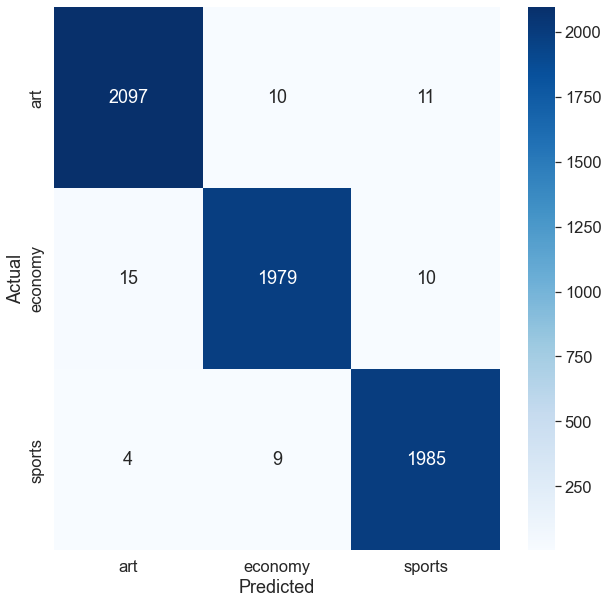

In [13]:
# Confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test, lr_y_predict)
sns.heatmap(cm, annot=True, fmt='.4g', cmap='Blues', ax = ax)
# confusion matrix labels
ax.xaxis.set_ticklabels(['art', 'economy', 'sports'])
ax.yaxis.set_ticklabels(['art', 'economy', 'sports'])
# axis labels
plt.xlabel('Predicted')
plt.ylabel('Actual')


**We need to build a function so that it can receive input article title from user and predict its category.** 

One thing to know is that user is not bound to enter a text that is preprocessed already, so we need to :

* build a preprocess() function to remove punctuation, lower(), remove stopwords.


* then, vectorize the string using tf-idf vectorizer.


* and finally, make predictions using our model.


We will make use of our preprocessing functions we wrote in preprocessing section.

In [14]:
# step1: remove punctuation
def remove_punctuation(text):
    puncts_free = "".join([i for i in text if i not in string.punctuation])
    return puncts_free

In [15]:
# step2: remove stopwords
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    stop_words_free = [i for i in text if i not in stop_words]
    return stop_words_free

In [16]:
def preprocess(text):
    puncts_free = remove_punctuation(text)
    sw_free = remove_stopwords(puncts_free)
    sw_free_string = "".join([i for i in sw_free])
    lowered = sw_free_string.lower()
    vectorized = tf_idf.transform([lowered])
    
    return vectorized

#### User input prediction

In [17]:
def input_predict(text):
    vectorized = preprocess(text)
    prediction = lr_tfidf.predict(vectorized)
    print("predicted category: ", prediction)

In [18]:
user_input_test = "UAE President issues Federal Law to maintain 2022 budget balance"
input_predict(user_input_test)

predicted category:  ['economy']


#### Naive Bayes

In [19]:
nb_tfidf = MultinomialNB()
# fit model
nb_tfidf.fit(X_train_vecs, y_train)
# predict y for the test set
nb_y_predict = nb_tfidf.predict(X_test_vecs)
nb_y_prob = nb_tfidf.predict_proba(X_test_vecs)

In [20]:
# Classification report
print(classification_report(y_test, nb_y_predict))

              precision    recall  f1-score   support

         art       0.99      0.99      0.99      2118
     economy       0.99      0.99      0.99      2004
      sports       0.99      0.99      0.99      1998

    accuracy                           0.99      6120
   macro avg       0.99      0.99      0.99      6120
weighted avg       0.99      0.99      0.99      6120



What we did for LogisticRegression can be done for NaiveBayes, but something is fishy here with the results.

### Final Thoughts

We did a pretty good job using both ml classifiers.

**In the next notebook, we will try text classification using LSTM.**